In [29]:
import csv
import numpy as np
import zipfile

def load_column_from_zip(zip_file_path, csv_filename, column_name):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        with zip_ref.open(csv_filename) as csvfile:
            reader = csv.reader(map(lambda line: line.decode('utf-8'), csvfile))
            header = next(reader)
            column_index = header.index(column_name)
            column_data = [row[column_index] for row in reader]
            return np.array(column_data, dtype=float)

planes_array = load_column_from_zip('C:/Users/Konstantin/Downloads/archive.zip', 'russia_losses_equipment.csv', 'aircraft')
print(planes_array)


[369. 369. 369. 369. 368. 368. 368. 368. 368. 368. 368. 368. 368. 368.
 368. 368. 368. 368. 368. 367. 367. 367. 367. 367. 367. 367. 367. 367.
 367. 367. 367. 367. 366. 366. 366. 366. 366. 366. 366. 365. 365. 365.
 363. 363. 363. 363. 363. 363. 363. 363. 363. 363. 363. 363. 362. 362.
 362. 362. 361. 361. 361. 361. 361. 361. 361. 361. 361. 361. 361. 361.
 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 359. 359. 359. 359.
 359. 359. 359. 359. 359. 359. 359. 359. 359. 359. 359. 359. 359. 358.
 357. 357. 357. 357. 357. 357. 357. 357. 357. 357. 357. 357. 357. 357.
 357. 356. 356. 355. 354. 354. 354. 354. 354. 353. 351. 351. 351. 350.
 350. 349. 349. 349. 349. 349. 349. 349. 348. 348. 348. 348. 348. 348.
 348. 348. 348. 348. 348. 348. 348. 348. 348. 347. 347. 347. 347. 347.
 347. 347. 347. 347. 347. 347. 347. 347. 347. 347. 347. 347. 347. 347.
 347. 347. 347. 347. 347. 347. 347. 347. 347. 347. 347. 347. 347. 347.
 347. 347. 347. 347. 347. 347. 347. 347. 347. 347. 347. 347. 347. 347.
 347. 

In [35]:
def calculate_daily_losses(planes_array):
    if len(planes_array) < 2:
        raise ValueError("Масив повинен містити хоча б два елементи для обчислення добових втрат.")

    daily_losses = np.diff(planes_array)
    return daily_losses

daily_losses = calculate_daily_losses(planes_array)
print(daily_losses)


[  0.   0.   0.  -1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.  -1.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.  -1.   0.   0.   0.   0.   0.   0.  -1.   0.   0.  -2.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.   0.   0.
   0.  -1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.  -1.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  -1.   0.  -1.  -1.   0.   0.   0.   0.  -1.  -2.   0.   0.  -1.   0.
  -1.   0.   0.   0.   0.   0.   0.  -1.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  -1.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  -1. 

In [41]:
def top_n_daily_losses_abs(daily_losses, n=3):
    abs_losses = np.abs(daily_losses)
    top_losses_indices = np.argsort(abs_losses)[-n:]
    return daily_losses[top_losses_indices]

top_losses_abs = top_n_daily_losses_abs(daily_losses, n=3)
print(top_losses_abs)


[ -9. -16. -17.]


In [49]:
import pandas as pd
import zipfile

def load_losses_from_zip(zip_file_path, csv_filename):
    
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        with zip_ref.open(csv_filename) as csvfile:
            df = pd.read_csv(csvfile)
    return df

def prepare_data_dict(df, date_column, losses_column):
   
    data_dict = pd.Series(df[losses_column].values, index=df[date_column]).to_dict()
    return data_dict

def calculate_losses_in_period(start_date, end_date, data_dict):
    
    start_losses = data_dict.get(start_date, 0)
    end_losses = data_dict.get(end_date, 0)
    
    return end_losses - start_losses

df = load_losses_from_zip('C:/Users/Konstantin/Downloads/archive.zip', 'russia_losses_equipment.csv')

data_dict = prepare_data_dict(df, 'date', 'aircraft')

losses_in_summer_2022 = calculate_losses_in_period('2022-06-01', '2022-08-31', data_dict)
print(f'Втрати літаків у період з 1 червня 2022 по 31 серпня 2022 становлять: {losses_in_summer_2022} одиниць')


Втрати літаків у період з 1 червня 2022 по 31 серпня 2022 становлять: 26 одиниць


In [1]:
import pandas as pd
import zipfile
from datetime import datetime, timedelta

def load_losses_from_zip(zip_file_path, csv_filename):
    
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        with zip_ref.open(csv_filename) as csvfile:
            df = pd.read_csv(csvfile)
    return df

def calculate_average_losses_last_days(df, date_column, losses_column, days=300):
   
    df[date_column] = pd.to_datetime(df[date_column])
    
    end_date = df[date_column].max()
    start_date = end_date - timedelta(days=days)
    
    recent_df = df[(df[date_column] >= start_date) & (df[date_column] <= end_date)]
    
    recent_df = recent_df.sort_values(by=date_column)
    recent_df['daily_losses'] = recent_df[losses_column].diff().fillna(0)
    
    average_losses = recent_df['daily_losses'].mean()
    
    return average_losses

df = load_losses_from_zip('C:/Users/Konstantin/Downloads/archive.zip', 'russia_losses_equipment.csv')

average_losses = calculate_average_losses_last_days(df, 'date', 'aircraft', days=300)
print(f'Середнє значення втрат авіації за останні 300 днів війни складає: {average_losses:.2f} одиниць на день')


Середнє значення втрат авіації за останні 300 днів війни складає: 0.15 одиниць на день


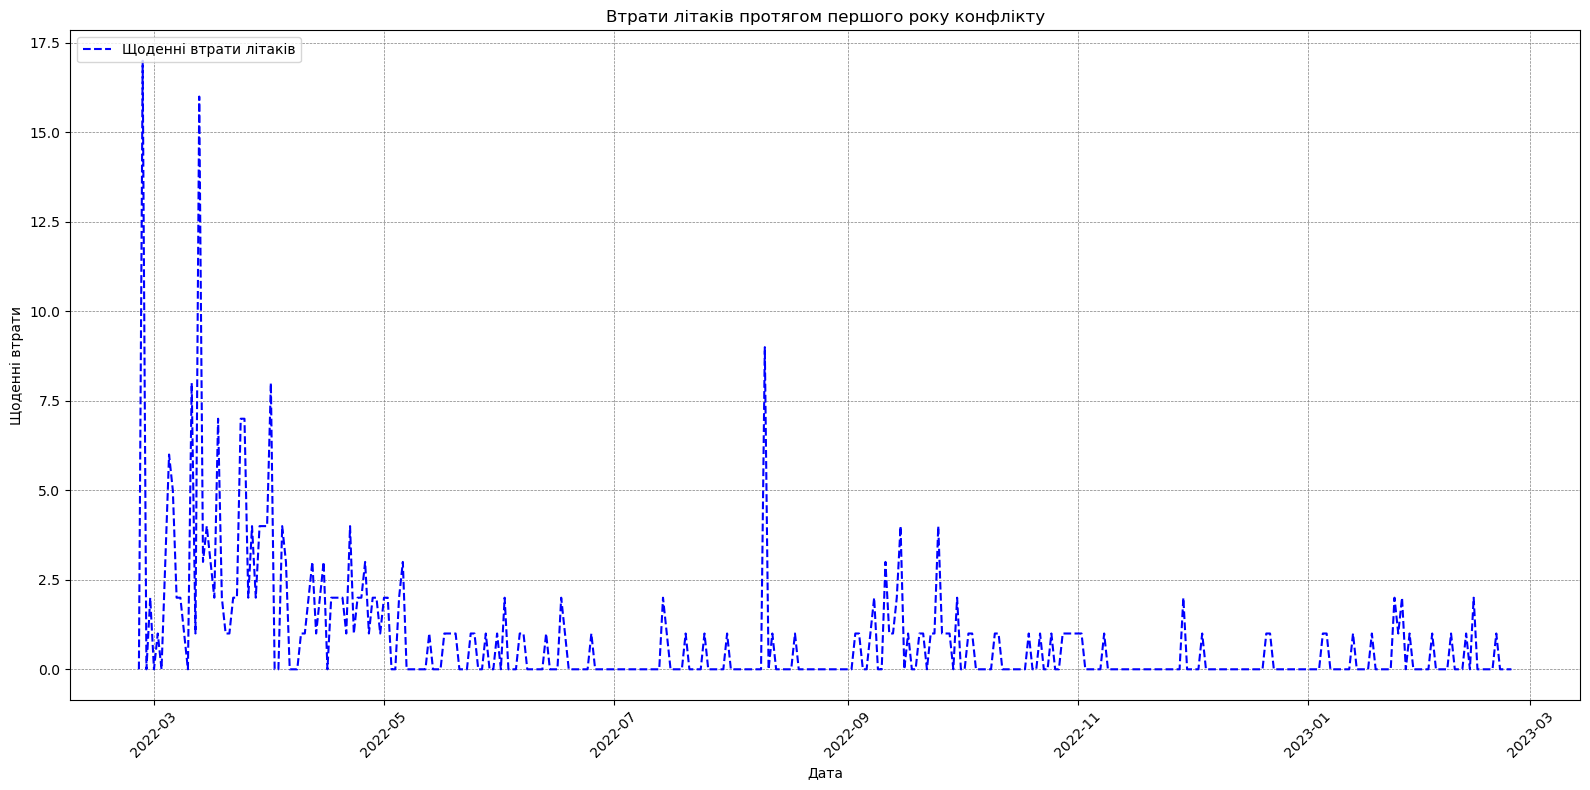

In [3]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
from datetime import datetime

def load_losses_from_zip(zip_file_path, csv_filename):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        with zip_ref.open(csv_filename) as csvfile:
            df = pd.read_csv(csvfile)
    return df

def plot_losses_first_year(df, date_column, losses_column):
   
    df[date_column] = pd.to_datetime(df[date_column])

    start_date = df[date_column].min()
    end_date = start_date + pd.DateOffset(years=1)

    first_year_df = df[(df[date_column] >= start_date) & (df[date_column] < end_date)]

    first_year_df = first_year_df.sort_values(by=date_column)
    first_year_df['daily_losses'] = first_year_df[losses_column].diff().fillna(0)

    plt.figure(figsize=(16, 8), dpi=100)
    plt.plot(first_year_df[date_column], first_year_df['daily_losses'], linestyle='--', color='b', label='Щоденні втрати літаків')

    plt.title('Втрати літаків протягом першого року конфлікту')
    plt.xlabel('Дата')
    plt.ylabel('Щоденні втрати')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.savefig('C:/Users/Konstantin/Downloads/aircraft_losses_first_year.png', format='png')

    plt.show()
    

df = load_losses_from_zip('C:/Users/Konstantin/Downloads/archive.zip', 'russia_losses_equipment.csv')

plot_losses_first_year(df, 'date', 'aircraft')
